In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups

In [3]:
# Core libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset
from sklearn.datasets import fetch_20newsgroups

# Text processing
import re
import string

# NLP tools
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

sns.set(style="whitegrid")


[nltk_data] Downloading package punkt to /home/olive/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/olive/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# ! pip install nltk

In [5]:
data= fetch_20newsgroups()
df = pd.DataFrame(data.data, columns=["text"])
df["target"] = data.target

In [6]:
df.head()

,text,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


In [7]:
# lambda functions

# lambda arguments: expression
# .apply(), map(), filter(), reduce() are some of the functions that can take 
# lambda functions as arguments.

# square of a function
square= lambda x: x**2
print(square(5))

25


In [8]:
# targe to name mapping
target_names = data.target_names
df["target_name"] = df["target"].apply(lambda x: target_names[x])
df.head()

,text,target,target_name
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7,rec.autos
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1,comp.graphics
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space


In [9]:
df["target"].apply(lambda x: target_names[x])

0                       rec.autos
1           comp.sys.mac.hardware
2           comp.sys.mac.hardware
3                   comp.graphics
4                       sci.space
                   ...           
11309                     sci.med
11310       comp.sys.mac.hardware
11311    comp.sys.ibm.pc.hardware
11312               comp.graphics
11313             rec.motorcycles
Name: target, Length: 11314, dtype: str

In [10]:
df.shape

(11314, 3)

In [11]:
df.head()

,text,target,target_name
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7,rec.autos
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1,comp.graphics
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space


In [12]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 11314 entries, 0 to 11313
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   text         11314 non-null  str  
 1   target       11314 non-null  int64
 2   target_name  11314 non-null  str  
dtypes: int64(1), str(2)
memory usage: 265.3 KB


In [13]:
# random examples
df.sample(5, random_state=42)

,text,target,target_name
7492,From: rrn@po.CWRU.Edu (Robert R. Novitskey)\nS...,4,comp.sys.mac.hardware
3546,From: ardie@ux1.cso.uiuc.edu (Ardie Mack)\nSub...,2,comp.os.ms-windows.misc
5582,From: tsa@cellar.org (The Silent Assassin)\nSu...,6,misc.forsale
4793,From: guy@idacom.hp.com (Guy M. Trotter)\nSubj...,16,talk.politics.guns
3813,From: jwodzia@fadel.uucp (john wodziak)\nSubje...,10,rec.sport.hockey


In [14]:
df.isna().sum()

text           0
target         0
target_name    0
dtype: int64

In [15]:
cat_counts= df["target_name"].value_counts()

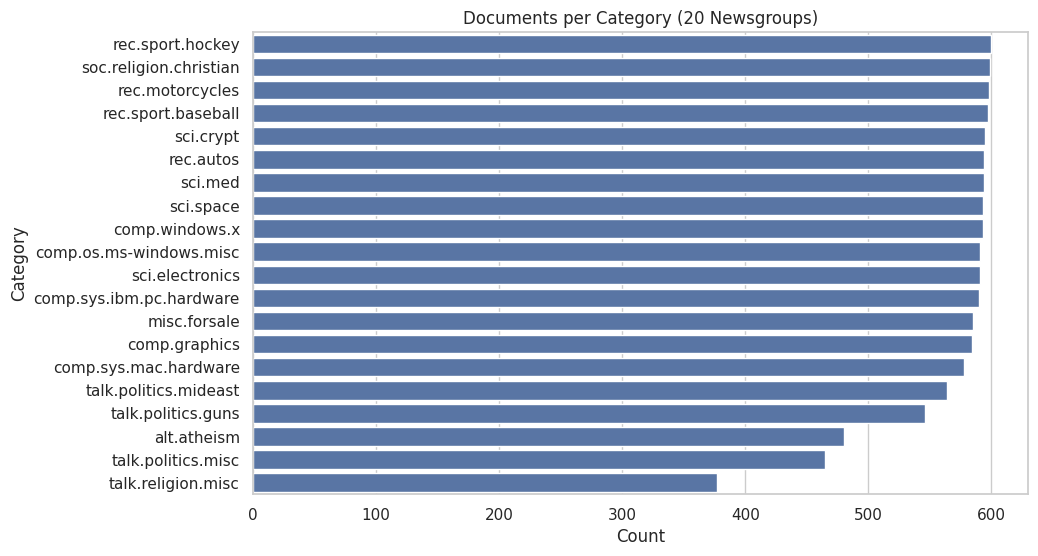

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(y="target_name", data=df, order=cat_counts.index)
plt.title("Documents per Category (20 Newsgroups)")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()


In [17]:
# Document Length (Characters)

df["char_len"]= df["text"].str.len()
df["char_len"].describe()

count    11314.000000
mean      1949.310058
std       4159.979767
min        125.000000
25%        753.250000
50%       1178.000000
75%       1881.000000
max      75154.000000
Name: char_len, dtype: float64

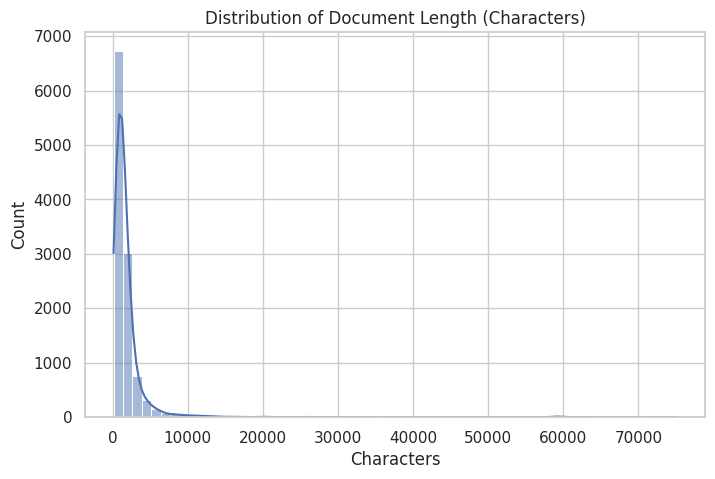

In [18]:
plt.figure(figsize=(8,5))
sns.histplot(df["char_len"], bins=60, kde=True)
plt.title("Distribution of Document Length (Characters)")
plt.xlabel("Characters")
plt.show()


In [19]:
# df["text"].str.split().apply(len)
df["word_len"]= df["text"].str.split().apply(len)
df["word_len"].describe()

count    11314.000000
mean       287.470126
std        541.482636
min         14.000000
25%        108.000000
50%        176.000000
75%        293.000000
max      11821.000000
Name: word_len, dtype: float64

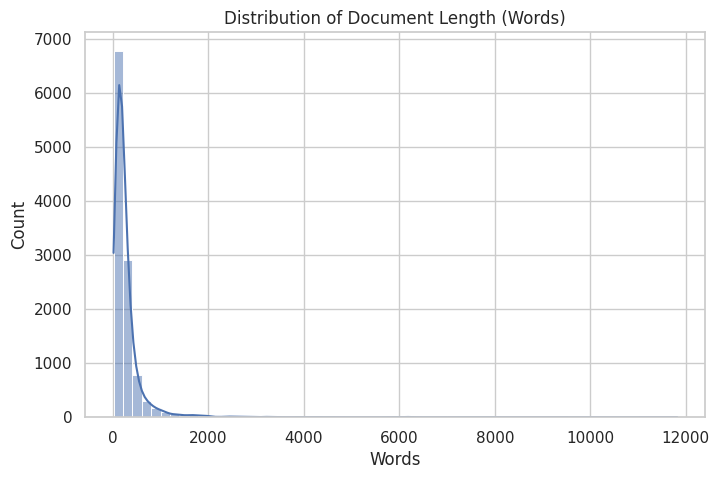

In [20]:
plt.figure(figsize=(8,5))
sns.histplot(df["word_len"], bins=60, kde=True)
plt.title("Distribution of Document Length (Words)")
plt.xlabel("Words")
plt.show()


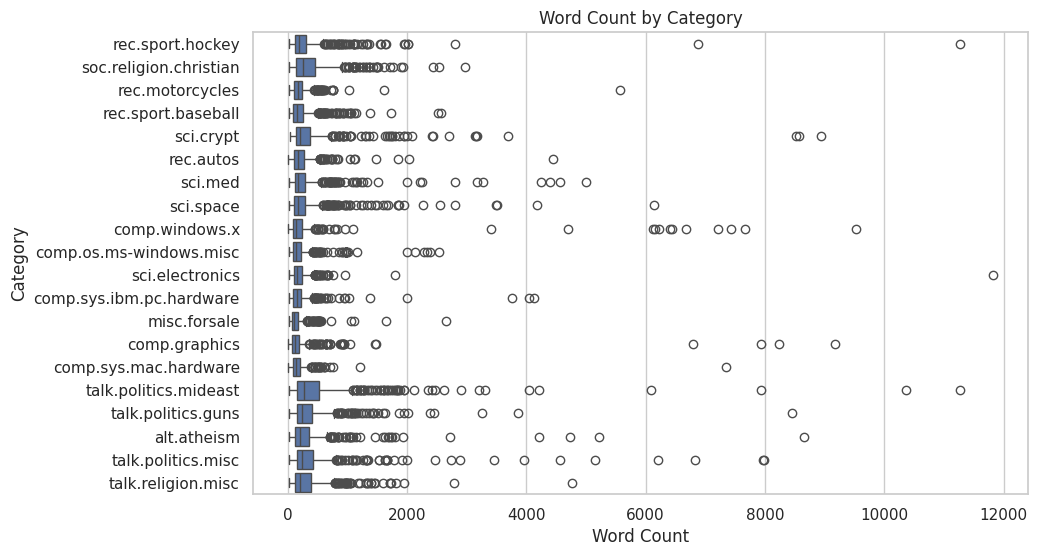

In [21]:
plt.figure(figsize=(10,6))
sns.boxplot(y="target_name", x="word_len", data=df, order=cat_counts.index)
plt.title("Word Count by Category")
plt.xlabel("Word Count")
plt.ylabel("Category")
plt.show()


In [22]:
df.head()

,text,target,target_name,char_len,word_len
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7,rec.autos,721,123
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware,858,123
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware,1981,339
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1,comp.graphics,815,113
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space,1120,171


In [23]:
print(df["text"][1])

From: guykuo@carson.u.washington.edu (Guy Kuo)
Subject: SI Clock Poll - Final Call
Summary: Final call for SI clock reports
Keywords: SI,acceleration,clock,upgrade
Article-I.D.: shelley.1qvfo9INNc3s
Organization: University of Washington
Lines: 11
NNTP-Posting-Host: carson.u.washington.edu

A fair number of brave souls who upgraded their SI clock oscillator have
shared their experiences for this poll. Please send a brief message detailing
your experiences with the procedure. Top speed attained, CPU rated speed,
add on cards and adapters, heat sinks, hour of usage per day, floppy disk
functionality with 800 and 1.4 m floppies are especially requested.

I will be summarizing in the next two days, so please add to the network
knowledge base if you have done the clock upgrade and haven't answered this
poll. Thanks.

Guy Kuo <guykuo@u.washington.edu>



In [24]:
df["has_from"] = df["text"].str.contains(r"\bFrom:", regex=True)
df["has_subject"] = df["text"].str.contains(r"\bSubject:", regex=True)

df[["has_from", "has_subject"]].mean()


has_from       1.0
has_subject    1.0
dtype: float64

#### Text cleaning


In [25]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

| Regex      | Meaning                        | What It Removes |
| ---------- | ------------------------------ | --------------- |
| `\S+@\S+`  | non-space + @ + non-space      | Emails          |
| `http\S+`  | http + non-space               | URLs            |
| `www\.\S+` | [www](http://www). + non-space | URLs            |
| `\d+`      | one or more digits             | Numbers         |
| `\s+`      | multiple whitespace            | Extra spaces    |


In [26]:
import re
import string

def basic_clean(text: str) -> str:
    text = text.lower()
    text = re.sub(r"\S+@\S+", " ", text)          # remove emails
    text = re.sub(r"http\S+|www\.\S+", " ", text) # remove urls
    text = re.sub(r"\d+", " ", text)              # remove numbers
    text = text.translate(str.maketrans("", "", string.punctuation))  # punctuation
    text = re.sub(r"\s+", " ", text).strip()      # extra spaces
    return text

df["clean_text"] = df["text"].apply(basic_clean)
df[["text", "clean_text"]].head(2)


,text,clean_text
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,from wheres my thing subject what car is this ...
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,from guy kuo subject si clock poll final call ...


In [27]:
df.head()

,text,target,target_name,char_len,word_len,has_from,has_subject,clean_text
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7,rec.autos,721,123,True,True,from wheres my thing subject what car is this ...
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware,858,123,True,True,from guy kuo subject si clock poll final call ...
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware,1981,339,True,True,from thomas e willis subject pb questions orga...
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1,comp.graphics,815,113,True,True,from joe green subject re weitek p organizatio...
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space,1120,171,True,True,from jonathan mcdowell subject re shuttle laun...


In [28]:
set(stopwords.words("english"))


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [29]:
word_tokenize(df["text"][9]) # tokenize the text into words

['From',
 ':',
 'kerr',
 '@',
 'ux1.cso.uiuc.edu',
 '(',
 'Stan',
 'Kerr',
 ')',
 'Subject',
 ':',
 'Re',
 ':',
 'Sigma',
 'Designs',
 'Double',
 'up',
 '?',
 '?',
 'Article-I.D',
 '.',
 ':',
 'ux1.C52u8x.B62',
 'Organization',
 ':',
 'University',
 'of',
 'Illinois',
 'at',
 'Urbana',
 'Lines',
 ':',
 '29',
 'jap10',
 '@',
 'po.CWRU.Edu',
 '(',
 'Joseph',
 'A.',
 'Pellettiere',
 ')',
 'writes',
 ':',
 '>',
 'I',
 'am',
 'looking',
 'for',
 'any',
 'information',
 'about',
 'the',
 'Sigma',
 'Designs',
 '>',
 'double',
 'up',
 'board',
 '.',
 'All',
 'I',
 'can',
 'figure',
 'out',
 'is',
 'that',
 'it',
 'is',
 'a',
 '>',
 'hardware',
 'compression',
 'board',
 'that',
 'works',
 'with',
 'AutoDoubler',
 ',',
 'but',
 '>',
 'I',
 'am',
 'not',
 'sure',
 'about',
 'this',
 '.',
 'Also',
 'how',
 'much',
 'would',
 'one',
 'cost',
 '?',
 'I',
 "'ve",
 'had',
 'the',
 'board',
 'for',
 'over',
 'a',
 'year',
 ',',
 'and',
 'it',
 'does',
 'work',
 'with',
 'Diskdoubler',
 ',',
 'but',
 '

In [30]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download("punkt")
nltk.download("stopwords")

stop_words = set(stopwords.words("english"))

def tokenize_remove_stopwords(text: str):
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t not in stop_words and len(t) > 2]
    return tokens

df["tokens"] = df["clean_text"].apply(tokenize_remove_stopwords)
df["token_len"] = df["tokens"].apply(len)

df["token_len"].describe()


[nltk_data] Downloading package punkt to /home/olive/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/olive/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


count    11314.000000
mean       146.180308
std        280.471238
min          8.000000
25%         56.000000
50%         89.000000
75%        146.000000
max       6283.000000
Name: token_len, dtype: float64

In [31]:
import nltk

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /home/olive/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/olive/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /home/olive/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
from collections import Counter

def top_words_for_category(cat, n=15):
    tokens = [t for tokens in df[df["target_name"] == cat]["tokens"] for t in tokens]
    return Counter(tokens).most_common(n)

example_cat = df["target_name"].value_counts().index[0]
top_words_for_category(example_cat)


[('team', 671),
 ('subject', 635),
 ('lines', 622),
 ('organization', 610),
 ('hockey', 593),
 ('game', 572),
 ('play', 451),
 ('would', 429),
 ('university', 416),
 ('writes', 415),
 ('nhl', 400),
 ('season', 365),
 ('one', 353),
 ('games', 345),
 ('players', 327)]

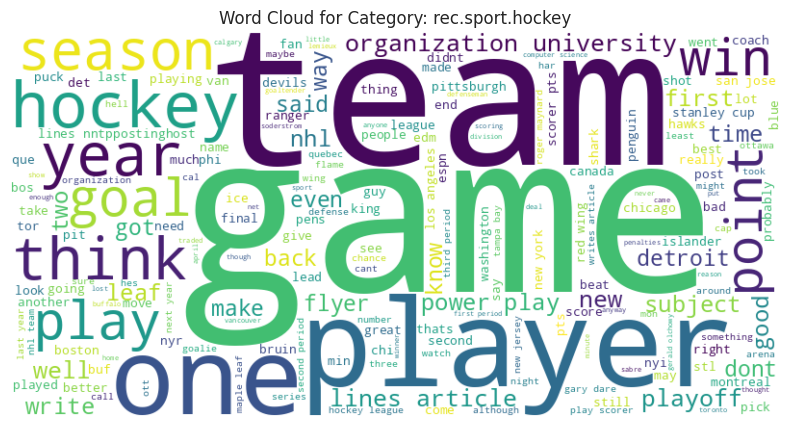

In [33]:
# visualize word clouds
from wordcloud import WordCloud
def plot_wordcloud_for_category(cat):
    tokens = [t for tokens in df[df["target_name"] == cat]["tokens"] for t in tokens]
    text = " ".join(tokens)
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for Category: {cat}")
    plt.show()

plot_wordcloud_for_category(example_cat)

In [35]:
# ! pip install wordcloud
df.head()

,text,target,target_name,char_len,word_len,has_from,has_subject,clean_text,tokens,token_len
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7,rec.autos,721,123,True,True,from wheres my thing subject what car is this ...,"[wheres, thing, subject, car, nntppostinghost,...",60
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware,858,123,True,True,from guy kuo subject si clock poll final call ...,"[guy, kuo, subject, clock, poll, final, call, ...",80
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware,1981,339,True,True,from thomas e willis subject pb questions orga...,"[thomas, willis, subject, questions, organizat...",164
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1,comp.graphics,815,113,True,True,from joe green subject re weitek p organizatio...,"[joe, green, subject, weitek, organization, ha...",63
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space,1120,171,True,True,from jonathan mcdowell subject re shuttle laun...,"[jonathan, mcdowell, subject, shuttle, launch,...",87


| Feature              | Stemming                    | Lemmatization                       |                      |
| -------------------- | --------------------------- | ----------------------------------- | -------------------- |
| Output validity      | May be non-words            | Valid base words (lemmas)           |                      |
| Linguistic awareness | No                          | Yes — uses POS & context            |                      |
| Computational cost   | Lower (faster)              | Higher (slower)                     |                      |
| Typical algorithms   | Porter, Snowball, Lancaster | Dictionary + morphological analysis |                      |
| Use in NLP           | Rough normalization         | Fine-grained semantic normalization | ([GeeksforGeeks][1]) |

[1]: https://www.geeksforgeeks.org/nlp/lemmatization-vs-stemming-a-deep-dive-into-nlps-text-normalization-techniques/?utm_source=chatgpt.com "Lemmatization vs. Stemming: A Deep Dive into NLP's Text ..."

- If precise and semantic meaning matters: we use lemmetization

- If speed and rough normalization needed, we prefer stemming

**Stemming**

cats → cat

agreed → agre

studying → studi


**Lemmetization**

cats → cat

agreed → agree

studying → study

better → good




In [37]:
print(df["clean_text"][0])

from wheres my thing subject what car is this nntppostinghost rac wamumdedu organization university of maryland college park lines i was wondering if anyone out there could enlighten me on this car i saw the other day it was a door sports car looked to be from the late s early s it was called a bricklin the doors were really small in addition the front bumper was separate from the rest of the body this is all i know if anyone can tellme a model name engine specs years of production where this car is made history or whatever info you have on this funky looking car please email thanks il brought to you by your neighborhood lerxst


### Text representation techniques

1. BagOfWords(BoW)

2. TF-IDF(Term-frequncy-Inverse Document Frequency)

3. Word Embeddings(eg. Word2Vec)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

documents= [
    "This is the first document.",
    "This document is the second document.",
    "And this is the third one."
]

# bow_representation={
#     "this": 3,
#     "is": 3,
#     "the": 3,
#     "first": 1,
#     "document": 3,
#     "second": 1,
#     "and": 1,
#     "third": 1,
#     "one": 1
# }

# # vector size of len(bow_representation) = 9


vectorizer= CountVectorizer()
X= vectorizer.fit_transform(documents)
print(X)
print(type(X))


<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 16 stored elements and shape (3, 9)>
  Coords	Values
  (0, 8)	1
  (0, 3)	1
  (0, 6)	1
  (0, 2)	1
  (0, 1)	1
  (1, 8)	1
  (1, 3)	1
  (1, 6)	1
  (1, 1)	2
  (1, 5)	1
  (2, 8)	1
  (2, 3)	1
  (2, 6)	1
  (2, 0)	1
  (2, 7)	1
  (2, 4)	1
<class 'scipy.sparse._csr.csr_matrix'>


In [42]:
documents= [
    "This is the first document.",
    "This document is the second document.",
    "And this is the third one."
]

print(vectorizer.get_feature_names_out())
X.toarray()

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 2, 0, 1, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 1, 1, 1]])

In [44]:
ngram_obj= CountVectorizer(ngram_range=(1,2)) # 1, 3 represents unigrams, bigrams, and trigrams. It will create features for single words, pairs of words, and triplets of words.
X_ngram= ngram_obj.fit_transform(documents)
print(ngram_obj.get_feature_names_out())
X_ngram.toarray()

['and' 'and this' 'document' 'document is' 'first' 'first document' 'is'
 'is the' 'one' 'second' 'second document' 'the' 'the first' 'the second'
 'the third' 'third' 'third one' 'this' 'this document' 'this is']


array([[0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1],
       [0, 0, 2, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0],
       [1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1]])

## TF-IDF Vectorizer

TF-IDF= TF* IDF scores
Words with high tf-idf scores are considered important for a document in the context of entire corpus

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer= TfidfVectorizer()

documents= [
    "This is the first document.",
    "This document is the second document.",
    "And this is the third one."
]

X_tfidf= tfidf_vectorizer.fit_transform(documents)

print(tfidf_vectorizer.get_feature_names_out())
print(X_tfidf.toarray())

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']
[[0.         0.46941728 0.61722732 0.3645444  0.         0.
  0.3645444  0.         0.3645444 ]
 [0.         0.7284449  0.         0.28285122 0.         0.47890875
  0.28285122 0.         0.28285122]
 [0.49711994 0.         0.         0.29360705 0.49711994 0.
  0.29360705 0.49711994 0.29360705]]


### Feature engineering

In [46]:
df["unique_word_count"]= df["clean_text"].apply(lambda x: len(set(x.split())))
df["lexical_diversity"] = df["unique_word_count"] / df["word_len"]

In [47]:
df.head()

,text,target,target_name,char_len,word_len,has_from,has_subject,clean_text,tokens,token_len,unique_word_count,lexical_diversity
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7,rec.autos,721,123,True,True,from wheres my thing subject what car is this ...,"[wheres, thing, subject, car, nntppostinghost,...",60,86,0.699187
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware,858,123,True,True,from guy kuo subject si clock poll final call ...,"[guy, kuo, subject, clock, poll, final, call, ...",80,92,0.747967
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware,1981,339,True,True,from thomas e willis subject pb questions orga...,"[thomas, willis, subject, questions, organizat...",164,196,0.578171
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1,comp.graphics,815,113,True,True,from joe green subject re weitek p organizatio...,"[joe, green, subject, weitek, organization, ha...",63,82,0.725664
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space,1120,171,True,True,from jonathan mcdowell subject re shuttle laun...,"[jonathan, mcdowell, subject, shuttle, launch,...",87,112,0.654971


In [48]:
df["avg_word_len"] = df["clean_text"].apply(
    lambda x: np.mean([len(w) for w in x.split()]) if len(x.split()) > 0 else 0
)


In [49]:
df.head()

,text,target,target_name,char_len,word_len,has_from,has_subject,clean_text,tokens,token_len,unique_word_count,lexical_diversity,avg_word_len
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7,rec.autos,721,123,True,True,from wheres my thing subject what car is this ...,"[wheres, thing, subject, car, nntppostinghost,...",60,86,0.699187,4.344538
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware,858,123,True,True,from guy kuo subject si clock poll final call ...,"[guy, kuo, subject, clock, poll, final, call, ...",80,92,0.747967,5.258333
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware,1981,339,True,True,from thomas e willis subject pb questions orga...,"[thomas, willis, subject, questions, organizat...",164,196,0.578171,4.394904
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1,comp.graphics,815,113,True,True,from joe green subject re weitek p organizatio...,"[joe, green, subject, weitek, organization, ha...",63,82,0.725664,5.306122
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space,1120,171,True,True,from jonathan mcdowell subject re shuttle laun...,"[jonathan, mcdowell, subject, shuttle, launch,...",87,112,0.654971,4.798701


In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df["clean_text"], df['target'], test_size=0.2, random_state=42, stratify=df["target"]
)



In [51]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(9051,) (2263,) (9051,) (2263,)


In [56]:
# unique words count in entire corpus
unique_words = set(word for text in df["clean_text"] for word in text.split())
print(f"Total unique words in corpus: {len(unique_words)}")

Total unique words in corpus: 106467


In [61]:
from sklearn.feature_extraction.text import CountVectorizer

bow = CountVectorizer(
    max_features=20000,
    ngram_range=(1,2),
    min_df=5,
    max_df=0.8
)

X_train_bow = bow.fit_transform(X_train)
X_test_bow = bow.transform(X_test)


In [62]:
X_train_bow.shape, X_test_bow.shape

((9051, 20000), (2263, 20000))

In [63]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack, csr_matrix

structured_cols = [
    "char_len",
    "word_len",
    "token_len",
    "unique_word_count",
    "lexical_diversity",
    "avg_word_len"
]

X_struct = df.loc[X_train.index, structured_cols].values
X_struct_test = df.loc[X_test.index, structured_cols].values

scaler = StandardScaler()
X_struct_scaled = scaler.fit_transform(X_struct)
X_struct_test_scaled = scaler.transform(X_struct_test)

X_struct_sparse = csr_matrix(X_struct_scaled)
X_struct_test_sparse = csr_matrix(X_struct_test_scaled)


In [64]:
X_struct_sparse.shape, X_struct_test_sparse.shape

((9051, 6), (2263, 6))

In [65]:
# csr_matrix is a sparse matrix format that efficiently stores and processes large sparse matrices,
#  which are common in text data after vectorization. It allows for efficient storage and fast arithmetic
#  operations, making it ideal for handling the high-dimensional feature space of text data.

X_train_bow_final = hstack([X_train_bow, X_struct_sparse])
X_test_bow_final = hstack([X_test_bow, X_struct_test_sparse])


In [67]:
print(X_train_bow_final.shape, X_test_bow_final.shape, y_train.shape, y_test.shape)

(9051, 20006) (2263, 20006) (9051,) (2263,)


In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=20000,
    ngram_range=(1,2),
    min_df=5,
    max_df=0.8
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [70]:
X_train_tfidf_final = hstack([X_train_tfidf, X_struct_sparse])
X_test_tfidf_final = hstack([X_test_tfidf, X_struct_test_sparse])


In [71]:
print(X_train_tfidf_final.shape, X_test_tfidf_final.shape, y_train.shape, y_test.shape)

(9051, 20006) (2263, 20006) (9051,) (2263,)


### Modeling

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


clf= LogisticRegression(max_iter=1000)

clf.fit(X_train_bow_final, y_train)
y_pred_bow= clf.predict(X_test_bow_final)

print("BOW result")

print(classification_report(y_test, y_pred_bow))

BOW result
              precision    recall  f1-score   support

           0       0.90      0.79      0.84        96
           1       0.72      0.82      0.76       117
           2       0.83      0.81      0.82       118
           3       0.65      0.72      0.68       118
           4       0.79      0.78      0.79       115
           5       0.85      0.79      0.82       119
           6       0.73      0.79      0.76       117
           7       0.84      0.82      0.83       119
           8       0.96      0.88      0.92       120
           9       0.90      0.93      0.92       119
          10       0.94      0.92      0.93       120
          11       0.96      0.91      0.93       119
          12       0.84      0.83      0.83       118
          13       0.87      0.93      0.90       119
          14       0.92      0.92      0.92       119
          15       0.81      0.84      0.83       120
          16       0.90      0.93      0.91       109
          17    

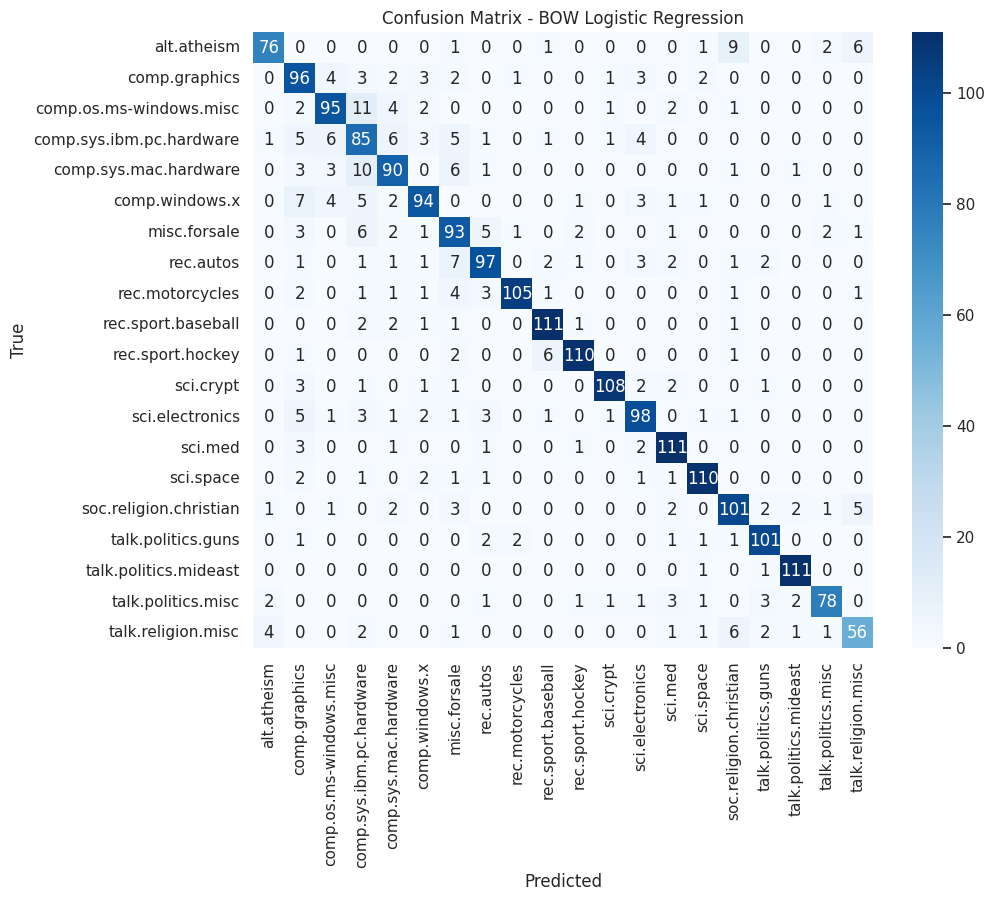

In [74]:
# plotting confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred_bow)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - BOW Logistic Regression")
plt.show()

In [76]:
# making inference on a single document
sample_doc = "I need help with my health. It keeps crashing and I don't know why."
sample_doc_clean = basic_clean(sample_doc)
sample_doc_tokens = tokenize_remove_stopwords(sample_doc_clean)
sample_doc_bow = bow.transform([sample_doc_clean])
sample_doc_struct = np.array([[len(sample_doc), len(sample_doc.split()), len(sample_doc_tokens), len(set(sample_doc_tokens)), len(set(sample_doc_tokens)) / len(sample_doc_tokens) if len(sample_doc_tokens) > 0 else 0, np.mean([len(w) for w in sample_doc_clean.split()])]])
sample_doc_struct_sparse = csr_matrix(sample_doc_struct)
sample_doc_final = hstack([sample_doc_bow, sample_doc_struct_sparse])
sample_pred = clf.predict(sample_doc_final)
print(f"Predicted category for sample document: {data.target_names[sample_pred[0]]}")


Predicted category for sample document: talk.politics.guns
